In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


<Axes: xlabel='Age', ylabel='Income($)'>

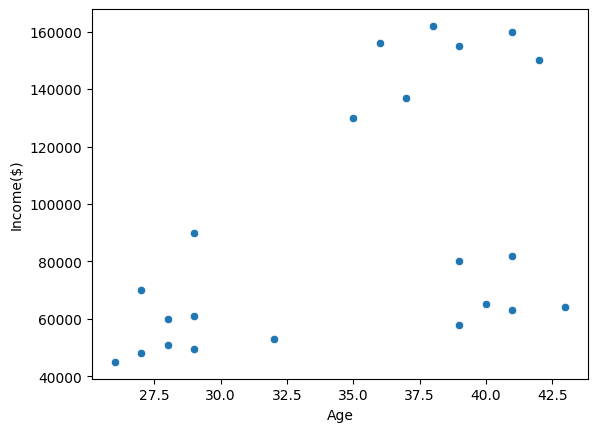

In [3]:
sns.scatterplot(df,x='Age',y='Income($)')

In [5]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3)
km.fit(df[['Age','Income($)']])
km.labels_

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

<Axes: xlabel='Age', ylabel='Income($)'>

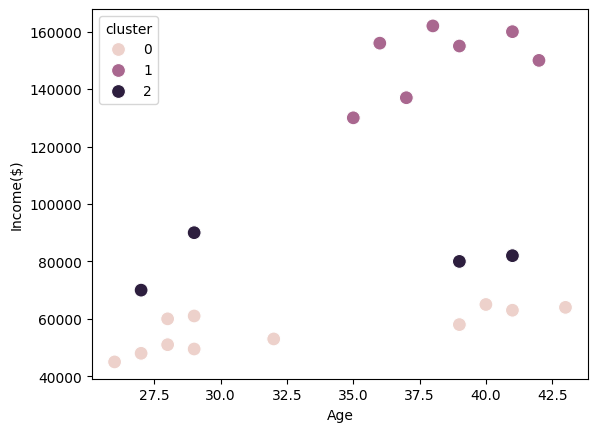

In [7]:
df['cluster'] = km.labels_

sns.scatterplot(df,x='Age',y='Income($)',s=100,hue='cluster')

Here as we see the cluster is not form correctly as per the actual this happend due to not having propered `scaled data`

In [11]:
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()
scale = scale.fit_transform(df[['Age','Income($)']])

In [19]:
df_scale = pd.DataFrame(scale,columns=['Age','Income($)'])
df_scale['Name'] =df['Name']
df_scale

,Age,Income($),Name
0,0.058824,0.213675,Rob
1,0.176471,0.384615,Michael
2,0.176471,0.136752,Mohan
3,0.117647,0.128205,Ismail
4,0.941176,0.897436,Kory
5,0.764706,0.940171,Gautam
6,0.882353,0.982906,David
7,0.705882,1.000000,Andrea
8,0.588235,0.948718,Brad
9,0.529412,0.726496,Angelina


In [42]:
km.fit(df_scale[['Age','Income($)']])
km.labels_

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2],
      dtype=int32)

<Axes: xlabel='Age', ylabel='Income($)'>

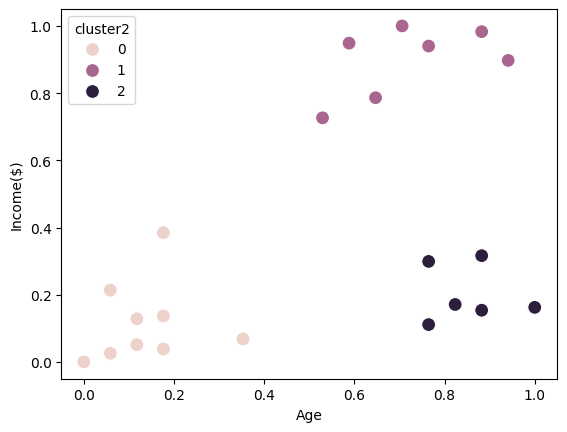

In [43]:
df_scale['cluster2'] = km.labels_

sns.scatterplot(df_scale,x='Age',y='Income($)',s=100,hue='cluster2')

In [ ]:
center_x = km.cluster_centers_[:,0]
center_y = km.cluster_centers_[:,1]


<Axes: xlabel='Age', ylabel='Income($)'>

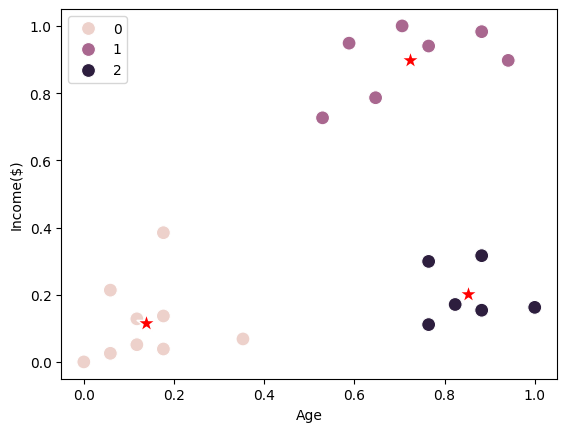

In [53]:
sns.scatterplot(df_scale,x='Age',y='Income($)',s=100,hue='cluster2')
sns.scatterplot(x=center_x,y=center_y,color='red',s=200,marker='*')

Elbow Methode

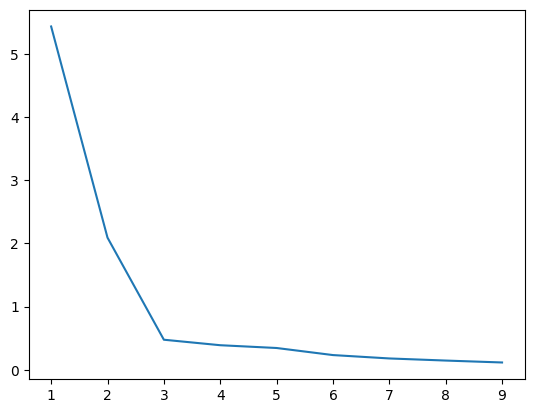

In [61]:
sse = []

k_rang = range(1,10)
for k in k_rang:
    km = KMeans(n_clusters=k,n_init='auto')
    km.fit(df_scale[['Age','Income($)']])
    sse.append(km.inertia_)

sns.lineplot(x=k_rang,y=sse)
plt.show()